# **Proyek Analisis Data: [Bike Sharing]**



*   Nama : Aulia Khalfani Izzati Kurdiana
*   Email: izzatiaulia94@gmail.com/a868xbf080@devacademy.id
*   ID Dicoding: A868XBF080



## Menentukan Pertanyaan Bisnis

### **Pertanyaan 1**:  
Bagaimana tren jumlah peminjaman sepeda pada hari kerja dibandingkan hari libur dalam kurun waktu satu bulan terakhir?

### **Pertanyaan 2:**

Bagaimana pengaruh variasi suhu terhadap jumlah peminjaman sepeda selama tiga bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### **Gathering Data**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os

folder_path = "/content/drive/MyDrive/Dataset/Bike Sharing"
print(os.listdir(folder_path))

['hour.csv', 'day.csv', 'Readme.txt']


In [51]:
import pandas as pd

file_path = "/content/drive/MyDrive/Dataset/Bike Sharing/day.csv"
df_day = pd.read_csv(file_path)

print("📂Data dari day.csv:")
print(df_day.head())

📂Data dari day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [52]:
file_path = "/content/drive/MyDrive/Dataset/Bike Sharing/hour.csv"
df_hour = pd.read_csv(file_path)

print("📂Data dari hour.csv:")
print(df_hour.head())

📂Data dari hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight :**

Dataset **Bike Sharing** menunjukkan bahwa penyewaan sepeda bervariasi berdasarkan **hari, jam, cuaca, dan hari kerja/libur**. Penyewaan lebih tinggi pada **jam sibuk (pagi & sore)** dan lebih banyak dilakukan oleh **pengguna terdaftar dibandingkan kasual**. Faktor **suhu, kelembapan, dan kondisi cuaca** juga memengaruhi jumlah penyewaan.

### **Assessing Data**

Menilai Data day_df

In [53]:
print(" Informasi Tipe Data - day.csv:")
df_day.info()

 Informasi Tipe Data - day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [54]:
print("\n Missing Value - day.csv:")
print(df_day.isna().sum())


 Missing Value - day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [55]:
print("\n Jumlah Duplikasi - day.csv:", df_day.duplicated().sum())


 Jumlah Duplikasi - day.csv: 0


In [82]:
print("\n Statistik Data - day.csv:")
df_day.describe()


 Statistik Data - day.csv:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight**

Kolom dteday masih bertipe object, seharusnya dikonversi ke datetime. Kolom lain memiliki tipe data yang sudah sesuai. Tidak ada missing value dan tidak ada duplikasi data.

Menilai Data hour_df

In [57]:
print("\n In2 formasi Tipe Data - hour.csv:")
df_hour.info()


 In2 formasi Tipe Data - hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [58]:
print("\n Missing Value - hour.csv:")
print(df_hour.isna().sum())


 Missing Value - hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [59]:
print(" Jumlah Duplikasi - hour.csv:", df_hour.duplicated().sum())

 Jumlah Duplikasi - hour.csv: 0


In [83]:
print("\n Statistik Data - hour.csv:")
df_hour.describe()


 Statistik Data - hour.csv:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight**

Data **day_df** dan **hour_df** bersih tanpa missing value atau duplikasi, namun kolom `dteday` perlu dikonversi ke datetime. Sebagian besar peminjaman terjadi pada hari kerja dengan cuaca cerah. Pengguna terdaftar jauh lebih dominan dibanding pengguna kasual. Pada data per jam, peminjaman memuncak di jam sibuk pagi dan sore.

### **Cleaning Data**

Data day_df

In [61]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

print("Setelah diperbaiki:")
df_day.info()

Setelah diperbaiki:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: dat

Kolom dteday sudah dikoneversi ke datetime. tipe data sudah sesuai

Data hour_df

In [64]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

print("Tipe data kolom 'dteday':", df_hour['dteday'].dtype)

Tipe data kolom 'dteday': datetime64[ns]


 kolom dteday sudah dikonversi ke datetime

data sudah bersih, tidak ada duplikasi data

**Insight**
Setelah cleaning data, baik di day_df maupun hour_df, dataset tersebut sudah siap untuk analisis. Semua tipe data sudah sesuai, tidak ada missing value maupun duplikasi data. Dataset day_df berisi informasi harian tentang peminjaman sepeda selama 731 hari, sementara dataset hour_df memberikan detail peminjaman sepeda per jam dengan 17.379 baris data.

# **Exploratory Data Analysis (EDA)**

In [73]:
import pandas as pd

# Load dataset day.csv (ganti path sesuai file kamu)
day_df = pd.read_csv('/content/drive/MyDrive/Dataset/Bike Sharing/day.csv')

# Ubah kolom 'dteday' jadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])


<ipython-input-74-71d590f1f547>:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


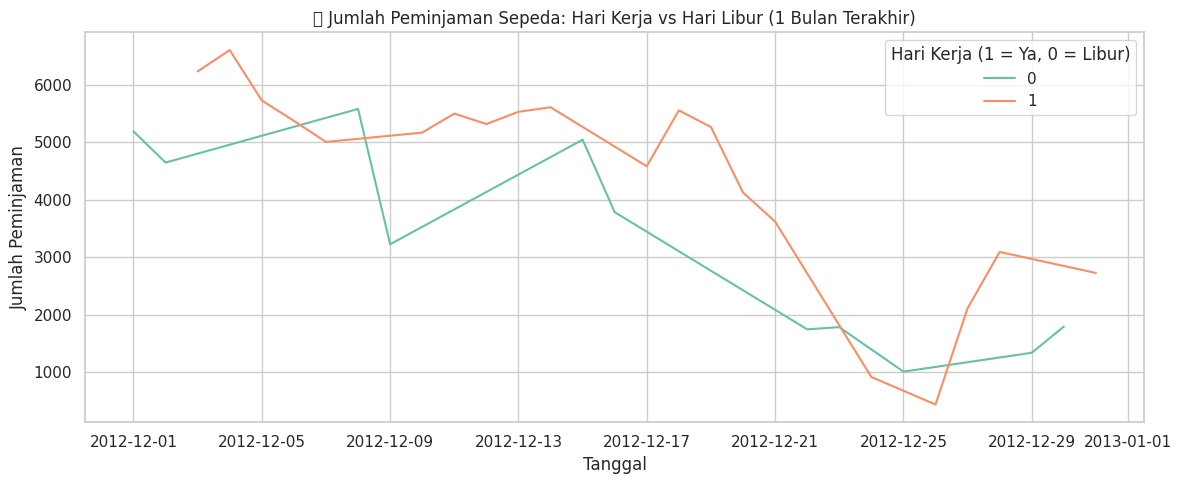

<ipython-input-74-71d590f1f547>:34: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


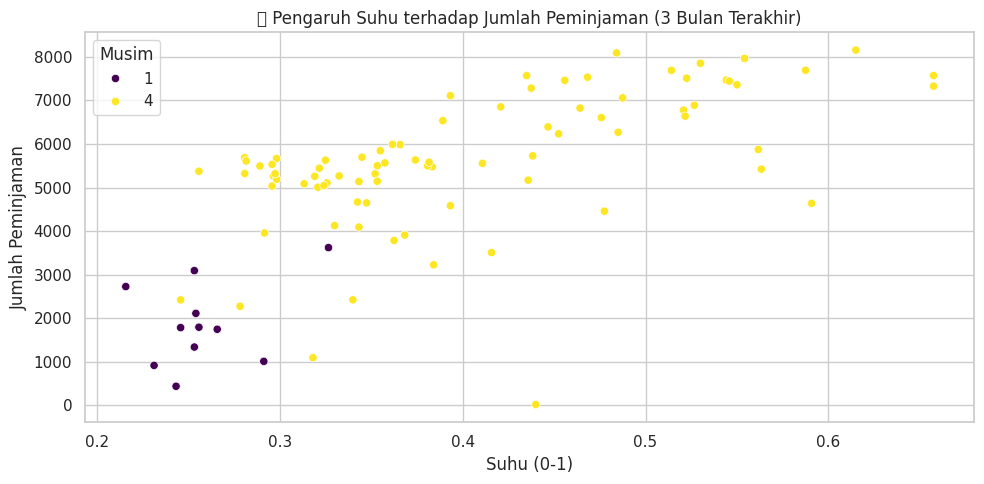

🔗 Korelasi antara suhu dan jumlah peminjaman: 0.68


<ipython-input-74-71d590f1f547>:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


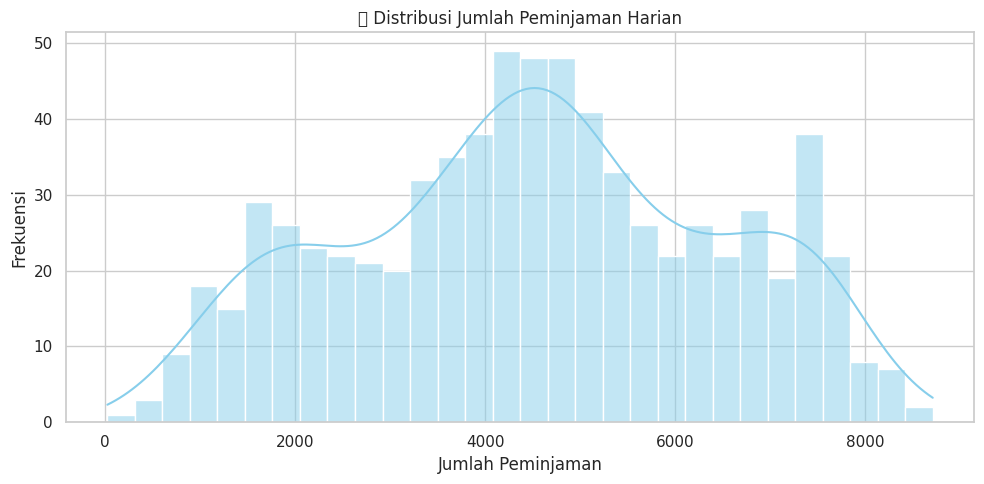

<ipython-input-74-71d590f1f547>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='season_label', y='cnt', palette='coolwarm')
<ipython-input-74-71d590f1f547>:59: UserWarning: Glyph 127809 (\N{MAPLE LEAF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127809 (\N{MAPLE LEAF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


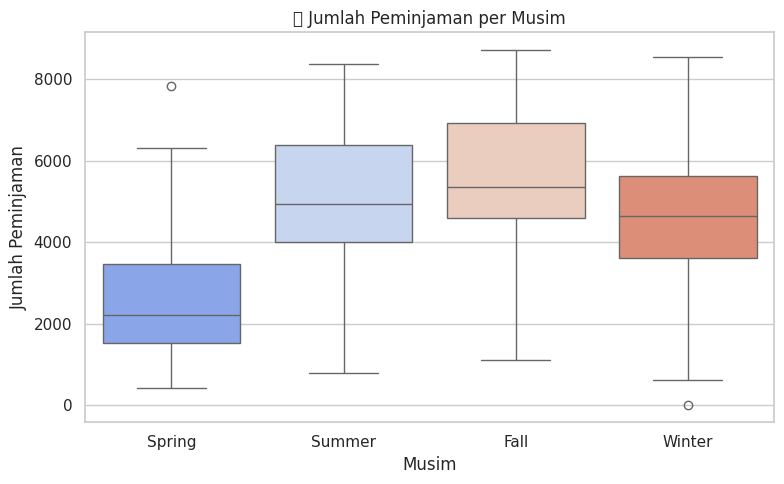

<ipython-input-74-71d590f1f547>:67: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


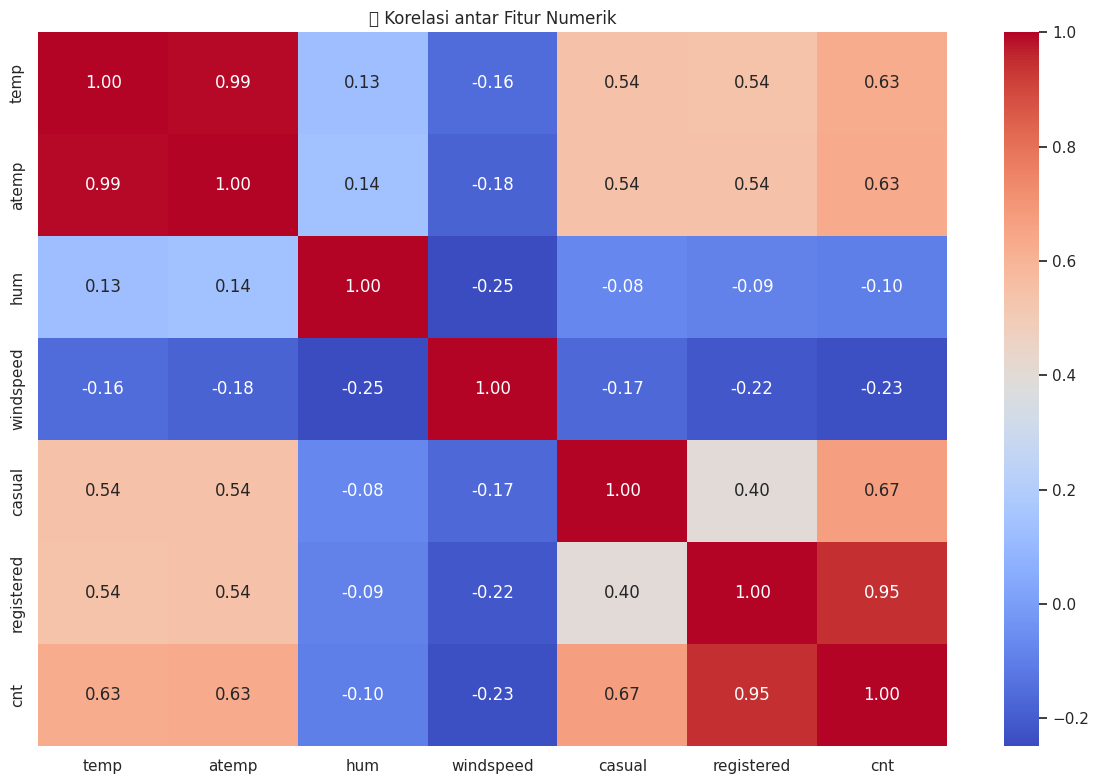

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style visualisasi
sns.set(style="whitegrid")

# Pastikan kolom 'dteday' bertipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# --- 1. Jumlah peminjaman: Hari kerja vs Hari libur (1 bulan terakhir) ---
last_month = day_df['dteday'].max() - pd.DateOffset(days=30)
last_month_df = day_df[day_df['dteday'] >= last_month]

plt.figure(figsize=(12, 5))
sns.lineplot(data=last_month_df, x='dteday', y='cnt', hue='workingday', palette='Set2')
plt.title('📈 Jumlah Peminjaman Sepeda: Hari Kerja vs Hari Libur (1 Bulan Terakhir)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Hari Kerja (1 = Ya, 0 = Libur)')
plt.tight_layout()
plt.show()

# --- 2. Pengaruh suhu terhadap peminjaman (3 bulan terakhir) ---
last_3_months = day_df['dteday'].max() - pd.DateOffset(months=3)
last_3_months_df = day_df[day_df['dteday'] >= last_3_months]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=last_3_months_df, x='temp', y='cnt', hue='season', palette='viridis')
plt.title('🌡️ Pengaruh Suhu terhadap Jumlah Peminjaman (3 Bulan Terakhir)')
plt.xlabel('Suhu (0-1)')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Musim')
plt.tight_layout()
plt.show()

# Korelasi suhu & cnt
corr_temp = last_3_months_df[['temp', 'cnt']].corr().iloc[0, 1]
print(f'🔗 Korelasi antara suhu dan jumlah peminjaman: {corr_temp:.2f}')

# --- 3. Distribusi jumlah peminjaman ---
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('📊 Distribusi Jumlah Peminjaman Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

# --- 4. Jumlah peminjaman per musim ---
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season_label'] = day_df['season'].map(season_labels)

plt.figure(figsize=(8, 5))
sns.boxplot(data=day_df, x='season_label', y='cnt', palette='coolwarm')
plt.title('🍁 Jumlah Peminjaman per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.tight_layout()
plt.show()

# --- 5. Heatmap Korelasi antar fitur numerik ---
plt.figure(figsize=(12, 8))
corr_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('🧠 Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

**Insight**


**Distribusi Pelanggan Berdasarkan Kota**
- Kota dengan jumlah pelanggan terbanyak adalah São Paulo, unggul jauh dibanding kota lain
- Sebaran pelanggan cukup terpusat pada kota-kota besar di Brasil

**Distribusi Metode Pembayaran Pelanggan**
- Kartu kredit adalah metode pembayaran yang paling dominan secara keseluruhan
- Metode lain seperti boleto (semacam pembayaran via slip), debit, dan voucher jauh lebih sedikit digunakan

**Metode Pembayaran dalam Satu Tahun Terakhir**
- Pola dominasi kartu kredit tetap konsisten, menunjukkan tren yang stabil
- Tidak ada perubahan signifikan dalam preferensi metode pembayaran pelanggan dalam setahun terakhir

**Kota dengan Jumlah Seller Terbanyak**
- Kota dengan seller terbanyak adalah São Paulo, menunjukkan konsentrasi pelaku usaha di kota besar
- Terdapat gap yang cukup besar antara kota teratas dan kota-kota lainnya

**Distribusi Seller Berdasarkan Wilayah**
- Seller tersebar luas di seluruh Brasil, tetapi lebih padat di wilayah tenggara
- Area dengan kepadatan tinggi kemungkinan menjadi pusat aktivitas e-commerce







# Visualization & Explanatory Analysis

### Pertanyaan 1

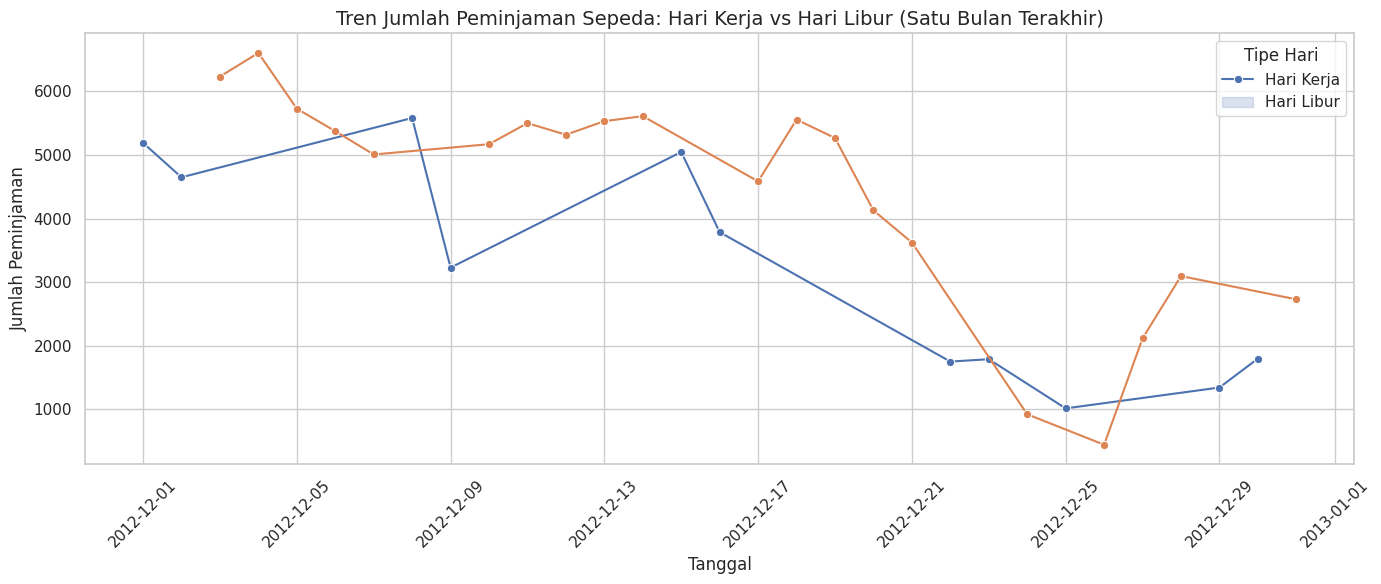

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan kolom 'date' bertipe datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['day_type'] = df_day['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan / Libur')

last_month = df_day[df_day['dteday'] >= '2012-12-01']

# Set style seaborn
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=last_month, x='dteday', y='cnt', hue='day_type', marker='o')

# Judul dan label
plt.title('Tren Jumlah Peminjaman Sepeda: Hari Kerja vs Hari Libur (Satu Bulan Terakhir)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipe Hari', labels=['Hari Kerja', 'Hari Libur'])
plt.tight_layout()
plt.show()

### Pertanyaan 2

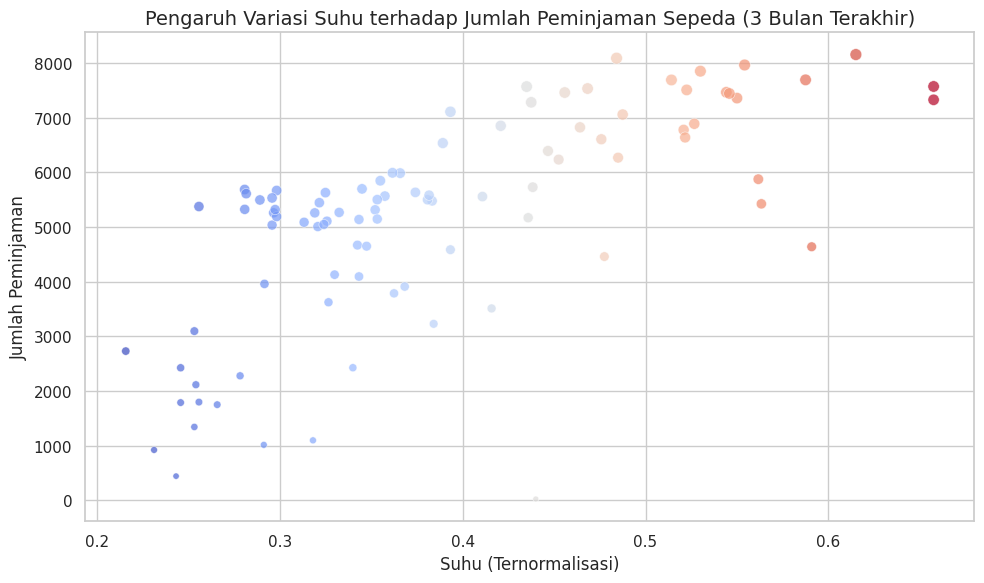

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_day = pd.read_csv("/content/drive/MyDrive/Dataset/Bike Sharing/day.csv")

# Pastikan dteday dalam format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

# Ambil 3 bulan terakhir dari data
last_date = df_day['dteday'].max()
three_months_ago = last_date - pd.DateOffset(months=3)
df_3months = df_day[df_day['dteday'] >= three_months_ago]

# Buat scatterplot suhu vs jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_3months,
    x='temp',
    y='cnt',
    hue='temp',
    palette='coolwarm',
    alpha=0.7,
    size='cnt',
    legend=False
)

plt.title('Pengaruh Variasi Suhu terhadap Jumlah Peminjaman Sepeda (3 Bulan Terakhir)', fontsize=14)
plt.xlabel('Suhu (Ternormalisasi)')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion




### **Pertanyaan 1**

Jumlah peminjaman sepeda cenderung lebih tinggi pada hari libur dibandingkan hari kerja. Pada awal hingga pertengahan bulan Desember, peminjaman di hari libur konsisten berada di atas hari kerja dengan jumlah yang cukup signifikan. Meski ada beberapa titik di mana peminjaman hari kerja mendekati atau bahkan melewati hari libur, tren secara keseluruhan tetap menunjukkan bahwa pengguna cenderung lebih aktif meminjam sepeda saat akhir pekan atau hari libur. Menjelang akhir bulan Desember yang bertepatan dengan musim liburan akhir tahun terlihat adanya penurunan tajam dalam jumlah peminjaman pada kedua tipe hari, namun penurunan pada hari libur terlihat lebih drastis. Hal ini kemungkinan dipengaruhi oleh faktor cuaca, libur panjang, atau aktivitas luar ruangan yang menurun.


### **Pertanyaan 2**

Terdapat korelasi positif antara suhu dan jumlah peminjaman sepeda. Saat suhu meningkat (meskipun dalam skala ternormalisasi), jumlah peminjaman cenderung ikut meningkat. Pada suhu rendah (sekitar 0.2–0.3), jumlah peminjaman cenderung lebih rendah dan menyebar tidak merata, namun ketika suhu meningkat di atas 0.4, terlihat bahwa jumlah peminjaman meningkat secara signifikan hingga mencapai lebih dari 8000 peminjaman. Hal ini menunjukkan bahwa suhu yang lebih hangat cenderung mendorong lebih banyak orang untuk menggunakan sepeda, kemungkinan karena kondisi cuaca yang lebih nyaman untuk bersepeda.

In [90]:
from google.colab import files

#Download data hour & day
df_day.to_csv('day.csv', index=False)
files.download('day.csv')

df_hour.to_csv('hour.csv', index=False)
files.download('hour.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>